In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

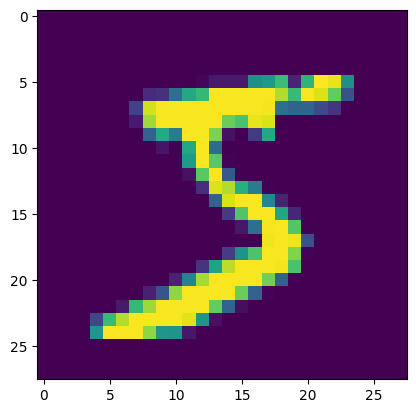

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))    # we dont have to give it a input number cause it automatically takes input from Flatten
model.add(Dense(32, activation='relu'))    # added more hidden layer for better accuracy
model.add(Dense(10, activation='softmax'))  # use softmax when there are more than 2 output in classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5905 - loss: 5.6338 - val_accuracy: 0.8123 - val_loss: 0.7296
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8095 - loss: 0.7347 - val_accuracy: 0.8597 - val_loss: 0.5486
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8860 - loss: 0.4566 - val_accuracy: 0.9114 - val_loss: 0.4148
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9214 - loss: 0.3351 - val_accuracy: 0.9375 - val_loss: 0.2801
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9430 - loss: 0.2329 - val_accuracy: 0.9474 - val_loss: 0.2485
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9521 - loss: 0.1944 - val_accuracy: 0.9540 - val_loss: 0.1983
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9609 - loss: 0.1528 - val_accuracy: 0.9501 - val_loss: 0.2032
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9662 - loss: 0.1262 - 

In [14]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.4721366e-24, 9.1303076e-11, 5.1846548e-13, ..., 9.9999994e-01,
        7.3659214e-30, 8.2046216e-16],
       [3.0095981e-21, 8.2522695e-07, 9.9999911e-01, ..., 5.2138390e-08,
        1.3157810e-26, 3.0941680e-31],
       [1.2096886e-11, 9.9999994e-01, 1.9367496e-14, ..., 4.1011652e-13,
        1.7402113e-11, 7.6280215e-10],
       ...,
       [5.3542063e-08, 3.9017367e-10, 1.2693829e-11, ..., 9.1670391e-14,
        2.1760530e-12, 4.0541846e-07],
       [5.9347369e-30, 0.0000000e+00, 0.0000000e+00, ..., 3.1952543e-30,
        2.8494608e-24, 4.7304187e-27],
       [7.0312722e-10, 2.6898893e-15, 7.7534477e-19, ..., 4.1826846e-28,
        9.8803101e-24, 2.1860075e-28]], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9681

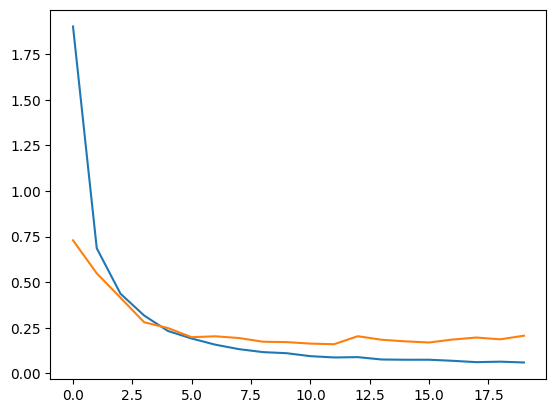

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

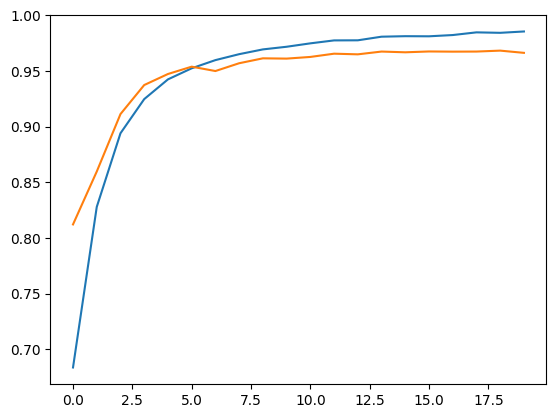

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

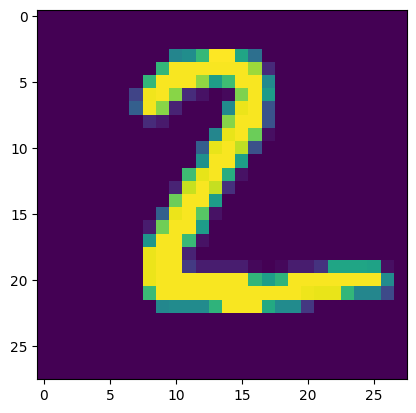

In [26]:
plt.imshow(X_test[1])

In [29]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([2])